<div style="border:solid green 2px; padding: 20px">
    
<b>Hello!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. My name is Alexander Matveevsky. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Project description

Working with the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms, and historical data on game sales are avaiable from open sources. Its needed to identify patterns that determine wether a game succeeds or not. This will allow to spot potential big winners and plan advertising campaigns.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great!

# Libraries

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer as SI


# Loading the Data

In [106]:
try:
    ds = pd.read_csv('../games.csv')
except:
    ds = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

It seems that the project was worked on locally and the file paths were not changed to publicly available ones. It is worth rewriting the code so that it would run both in the jupiter hub and locally without making any additional edits. This can be achieved in many ways. For example, use the try-except construct for file paths: try - paths on the local computer, except - paths on the server.

<div class="alert alert-info"> <b>Student сomments:</b> Yeah sorry i was working on locally. Should be all good now.</div>

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Now correct

In [107]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [108]:
ds.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1586,Watch Dogs,X360,2014.0,Action,0.72,0.41,0.01,0.11,NaN,5,M
694,Yokai Watch Busters,3DS,2015.0,Action,0.00,0.00,2.29,0.00,NaN,NaN,NaN
7052,Freedom Fighters,XB,2003.0,Shooter,0.17,0.05,0.00,0.01,82.0,8.2,T
10679,SCORE International Baja 1000: The Official Game,Wii,2008.0,Racing,0.09,0.00,0.00,0.01,NaN,NaN,NaN
5048,Age of Empires III,PC,2005.0,Strategy,0.00,0.33,0.00,0.05,81.0,7.7,T
16640,Hospital Tycoon,PC,2007.0,Strategy,0.00,0.01,0.00,0.00,51.0,3.8,E10+
4558,The Sims,XB,2003.0,Simulation,0.31,0.10,0.00,0.01,84.0,6.9,T
3543,XIII,PS2,2003.0,Shooter,0.28,0.22,0.00,0.07,73.0,8.6,M
690,Paper Mario: Sticker Star,3DS,2012.0,Role-Playing,1.12,0.41,0.64,0.14,75.0,5.6,E
2177,Army of Two: The 40th Day,X360,2010.0,Shooter,0.62,0.24,0.00,0.09,73.0,7.3,M


In [109]:
ds.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


# Preparing the Data

Setting up a copy of the data to work on that

In [110]:
df = ds.copy()

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great!

## Making the column names lowercase

In [111]:
columns = [a.lower() for a in df.keys()]
df.columns = columns

In [112]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Changing the columns datatype to the correct type

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Substituting missing values for the median can skew the data and introduce some problem in further analysis. Let me elaborate on the causes and consequences of this approach.

1. distortion of the distribution: When we replace missing values with the median, we are actually adding new values to the data set. This can lead to a shift in the distribution and distort the statistical properties of the data. Replacing by the median can make the data look more homogeneous than it actually is.

2. Possible consequences: Substituting missing values for the median can affect many aspects of data analysis:

   - Statistical tests: Distorted data can lead to incorrect conclusions in statistical tests. The use of skewed data can lead to incorrect results in significance tests and estimation of effects between groups or conditions.

   - Modeling: When distorted data are used to build models, models may also suffer from distortion and produce incorrect predictions or conclusions. This can be particularly important if missing values are associated with key model variables.

   - Inferences and interpretation: Distorted data can lead to incorrect inferences and misinterpretation of results. For example, if missing values are associated with important factors, replacing with the median may lead to misunderstanding the effect of these factors on the variable under study.


 So, instead of replacing missing values with median, it is recommended to apply other approaches to handle missing data such as:

- Removing records with missing values: If the number of records with missing values is small compared to the total amount of data, deleting these records may be a reasonable approach.

- Data Imputation: Using more sophisticated techniques such as data imputation can help recover missing values based on other variables in the dataset.For example, machine learning models can be used to predict missing values based on the available data.
It is important to assess the reason for missing values and choose an approach to handle them based on the specifics of the data and the objectives of the study.Proper handling of missing values helps to maintain the accuracy and reliability of data analysis.
   


<div class="alert alert-info"> <b>Student сomments:</b> Got it. Thou besides leaving it as the default mean strategy for the imputer dont really know what else to do. Is this ok? If not please tell me and ill get it better. Thank you!</div>

In [114]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [115]:
df[(df['user_score'] == 'tbd') & (df['year_of_release'] == 2016)].shape


(34, 11)

There seems to be that only 34 games from 2016 have a user score still to be determined. Im thinking they are so because of being recent releases at the moment the data was collected and not enough users had yet given their score. Although years before also have a similar amount of tbd games, only the ones from 2016 will be filled as the mean of the column. The rest will be treated as 0 when dealing with nan values further ahead

In [116]:
not_enough_data_mask = (df['user_score'] == 'tbd') & (df['year_of_release'] == 2016)
df.loc[not_enough_data_mask, 'user_score'] = 11

In [117]:
unpopular_mask = (df['user_score'] == 'tbd') & (df['year_of_release'] < 2016)
df.loc[unpopular_mask, 'user_score'] = 0

In [118]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', 'tbd', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5',
       '1.9', '3', '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8',
       '3.8', '0', '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', 11,
       '0.7', '1.2', '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1',
       '9.7'], dtype=object)

In [119]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, tbd is the same in meaning as skip

The user score value tbd (To Be Determined) will be considered as 0. It seems that the low popularity of those games had them unranked by the users. For the 2016 games the user rank will be the average of the column

In [120]:
imputer = SI()
df_num_w_nan = df.select_dtypes(exclude=['object'])
imputer.fit(df_num_w_nan)
df_num = imputer.transform(df_num_w_nan)
df_num = pd.DataFrame(data=df_num, columns=df_num_w_nan.columns)
df_cat = df.select_dtypes(include='object')
df = pd.concat([df_num, df_cat], axis=1)

In [121]:
df['year_of_release'] = df['year_of_release'].astype(int)


Changing the year of release column since it makes no sense for it to be a float, and the user score column since all user scores seem to range from 0 to 10. The rest of the columns seem to be of the correct type.

In [122]:
df.loc[df['user_score']>10, 'user_score'] = df[(df['user_score']<10) & (df['user_score']>0)]['user_score'].median()

## Checking for duplicates

In [123]:
df[df.duplicated(keep='last')]

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,name,platform,genre,rating


## Dealing with NaN

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16715 non-null  int64  
 1   na_sales         16715 non-null  float64
 2   eu_sales         16715 non-null  float64
 3   jp_sales         16715 non-null  float64
 4   other_sales      16715 non-null  float64
 5   critic_score     16715 non-null  float64
 6   user_score       16715 non-null  float64
 7   name             16713 non-null  object 
 8   platform         16715 non-null  object 
 9   genre            16713 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Name column

In [125]:
df[df['name'].isna()]

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,name,platform,genre,rating
659,1993,1.78,0.53,0.00,0.08,68.967679,5.463887,NaN,GEN,NaN,NaN
14244,1993,0.00,0.00,0.03,0.00,68.967679,5.463887,NaN,GEN,NaN,NaN


Dropping the NaN values since those two rows are highly uninformative

In [126]:
df = df.dropna(subset=['name'])

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct

Checking again for NaN

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16713 non-null  int64  
 1   na_sales         16713 non-null  float64
 2   eu_sales         16713 non-null  float64
 3   jp_sales         16713 non-null  float64
 4   other_sales      16713 non-null  float64
 5   critic_score     16713 non-null  float64
 6   user_score       16713 non-null  float64
 7   name             16713 non-null  object 
 8   platform         16713 non-null  object 
 9   genre            16713 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [128]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2006.478430,0.263302,0.145045,0.077625,0.047343,68.967679,5.452625
std,5.828368,0.813565,0.503359,0.308871,0.186742,9.725162,2.541373
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,68.967679,5.463887
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,68.967679,5.463887
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


<div class="alert alert-info"> <b>Student сomments:</b> Deleted the critic score section since its no longre relevant.</div>


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

similarly

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16713 non-null  int64  
 1   na_sales         16713 non-null  float64
 2   eu_sales         16713 non-null  float64
 3   jp_sales         16713 non-null  float64
 4   other_sales      16713 non-null  float64
 5   critic_score     16713 non-null  float64
 6   user_score       16713 non-null  float64
 7   name             16713 non-null  object 
 8   platform         16713 non-null  object 
 9   genre            16713 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


All the NaN in the column were filled with the median

### User score column

In [130]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2006.478430,0.263302,0.145045,0.077625,0.047343,68.967679,5.452625
std,5.828368,0.813565,0.503359,0.308871,0.186742,9.725162,2.541373
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,68.967679,5.463887
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,68.967679,5.463887
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


All the NaN in the column were filled with the median

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

similarly

### Rating column

In [131]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [132]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

similarly

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  16713 non-null  int64  
 1   na_sales         16713 non-null  float64
 2   eu_sales         16713 non-null  float64
 3   jp_sales         16713 non-null  float64
 4   other_sales      16713 non-null  float64
 5   critic_score     16713 non-null  float64
 6   user_score       16713 non-null  float64
 7   name             16713 non-null  object 
 8   platform         16713 non-null  object 
 9   genre            16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


All the NaN values in the rating column were filled with the mode of the column

## Feature Engineering

### Creating the total sales column

In [134]:
df['total_sales'] = df['eu_sales'] + df['jp_sales'] + df['na_sales'] + df['other_sales']

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
You can also use sum with axis=1 argument

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Please, add an intermediate conclusion about this introductory part. What have been done, what hypotheses about the data do we have and what we are going to do next

# Analyzing the Data

Text(0.5, 1.0, 'How many games where released each year\n')

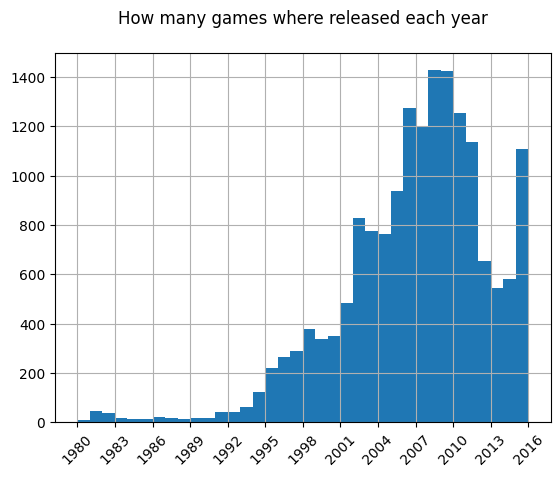

In [135]:
df['year_of_release'].hist(bins=36)
plt.xticks(range(df['year_of_release'].min(), df['year_of_release'].max() + 1, 3), rotation = 45)
plt.title('How many games where released each year\n')


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

The graph on the data is constructed correctly, but it is not fully designed. The point is that the graph should be visual without context (because in real practice you will show presentations or reports to outside people).

You need to make sure that there is always a title and signed axes. Please improve this point.

This comment applies to the whole project and double-check it yourself. I will not emphasize it further

Translated with DeepL.com (free version)

The data for the release years seems mostly left skewed, meaning that most games were released after the 2000s. The highest peak can be seen after 2010, which preceded a downfall and then it seems to be going for another rise.

In [136]:
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(4).reset_index()
top_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51


The top 4 best selling platforms are the PS2, Xbox360, PS3 and the Wii.

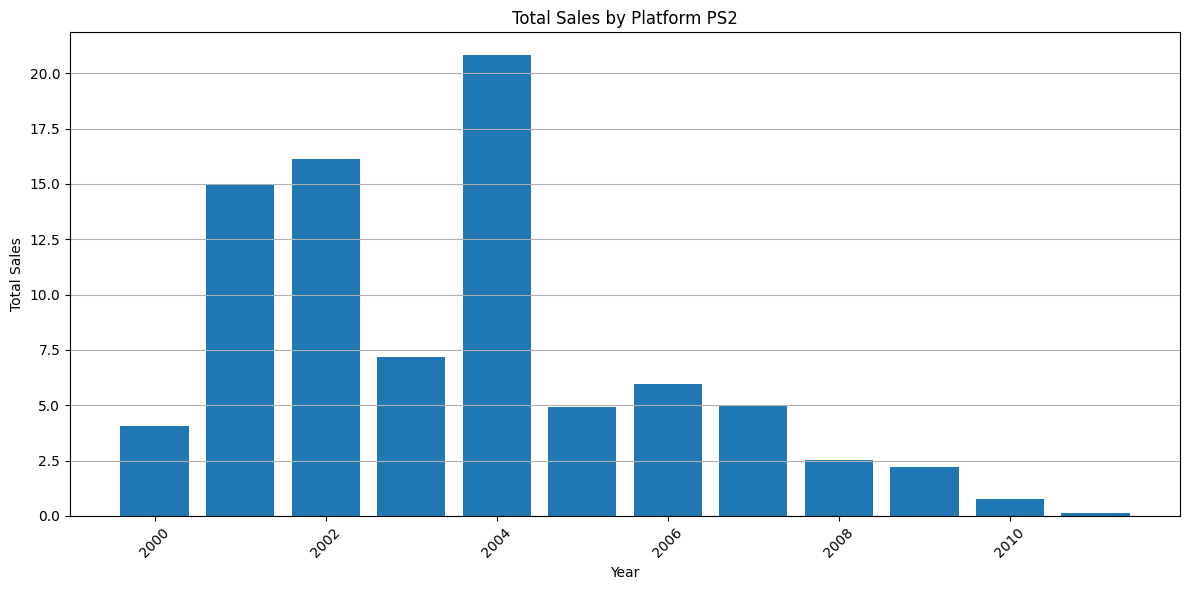

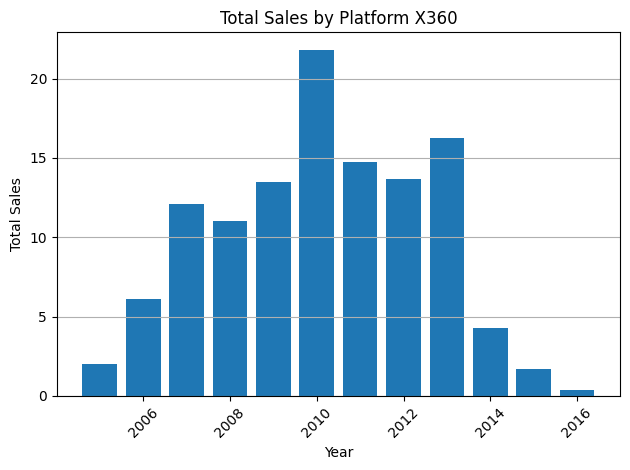

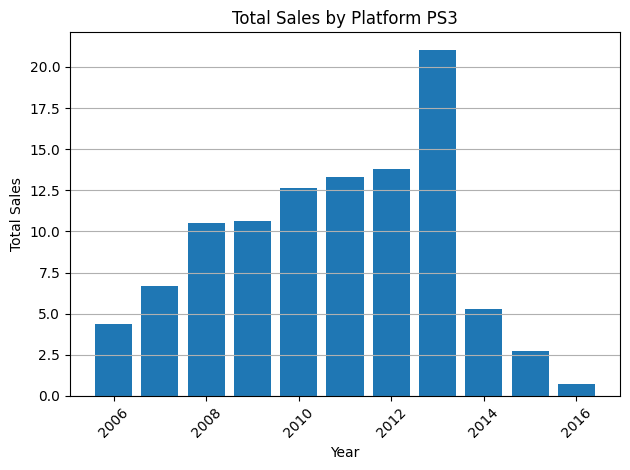

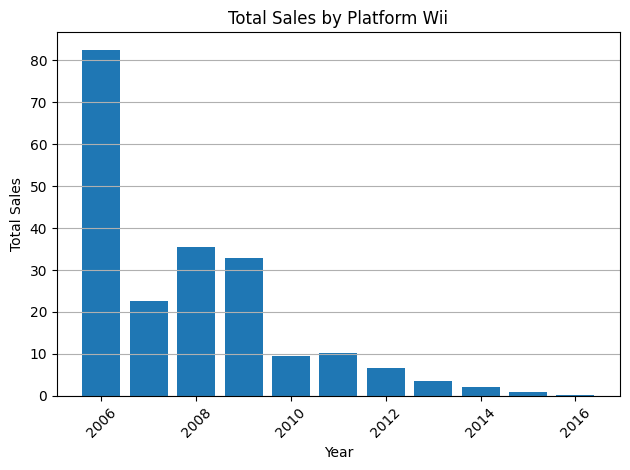

In [137]:
plt.figure(figsize=(12, 6))

for platform in top_platforms['platform']:
    platform_sales = df[df['platform'] == platform]

    plt.bar(platform_sales['year_of_release'], platform_sales['total_sales'], label=platform)
    plt.title(f'Total Sales by Platform {platform}')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()





We can see how the Wii had a huge amount of sales on its release year, then declined a lot yet keeping a considerable amount for the next 4 years but then lowering the amount of sales. Different from the PS3 that had its brightest spot several years after its release, mantaining a similar amount of sales each year. A similar case of the PS3 is the one of the Xbox360.

Text(0.5, 1.0, 'Sales by year (M)')

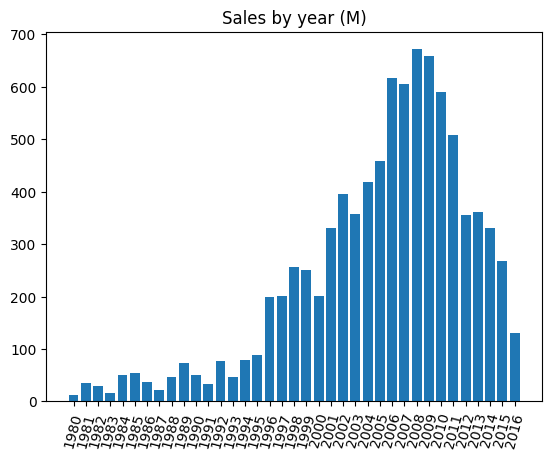

In [138]:
yearly_sales = df.groupby('year_of_release')['total_sales'].sum()
plt.bar(yearly_sales.reset_index()['year_of_release'], yearly_sales.reset_index()['total_sales'])
plt.xticks(range(yearly_sales.index[0], yearly_sales.index[-1]+1), rotation=75)
plt.title('Sales by year (M)')

The sales per year seem to follow the same pattern as the releases, except for the last rise in releases which was not preceeded by an increase in sales, yet it may be due to lack of data being the last year data was recorded.

In [139]:
platform_lifespans = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespans['lifespan'] = platform_lifespans['max'] - platform_lifespans['min']
platform_lifespans = platform_lifespans[platform_lifespans['max']!=2016]
platform_lifespans

,min,max,lifespan
platform,,,
2600,1980,2006,26
3DO,1994,1995,1
DC,1998,2008,10
DS,1985,2013,28
GB,1988,2006,18
GBA,2000,2007,7
GC,2001,2007,6
GEN,1990,1994,4
GG,1992,1992,0


In [140]:
platform_lifespans['lifespan'].median()

7.5

We usually see that platforms have a 7.5 year lifespan. We disregard the platforms still active in 2016 for that analysis.

In [141]:
all_selling_platforms = df.groupby('platform')['total_sales'].sum().reset_index()
all_selling_platforms['total_sales'].mean()

287.5254838709677

In [142]:
popular_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
popular_platforms = popular_platforms[popular_platforms>all_selling_platforms['total_sales'].mean()]
popular_platforms.reset_index()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05


In [143]:
popular_platform_lifespans = df[df['platform'].isin(popular_platforms.reset_index()['platform'])].groupby('platform')['year_of_release'].agg(['min', 'max'])
popular_platform_lifespans['lifespan'] = popular_platform_lifespans['max'] - popular_platform_lifespans['min']
# popular_platform_lifespans = popular_platform_lifespans[popular_platform_lifespans['max']!=2016]
popular_platform_lifespans

,min,max,lifespan
platform,,,
DS,1985,2013,28
GBA,2000,2007,7
PS,1994,2006,12
PS2,2000,2011,11
PS3,2006,2016,10
PS4,2013,2016,3
PSP,2004,2015,11
Wii,2006,2016,10
X360,2005,2016,11


In [144]:
popular_platform_lifespans['lifespan'].median()

11.0

We also see that popular platforms had a lifespan of 11 years.

In [145]:
df

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,name,platform,genre,rating,total_sales
0,2006,41.36,28.96,3.77,8.45,76.000000,8.000000,Wii Sports,Wii,Sports,E,82.54
1,1985,29.08,3.58,6.81,0.77,68.967679,5.463887,Super Mario Bros.,NES,Platform,E,40.24
2,2008,15.68,12.76,3.79,3.29,82.000000,8.300000,Mario Kart Wii,Wii,Racing,E,35.52
3,2009,15.61,10.93,3.28,2.95,80.000000,8.000000,Wii Sports Resort,Wii,Sports,E,32.77
4,1996,11.27,8.89,10.22,1.00,68.967679,5.463887,Pokemon Red/Pokemon Blue,GB,Role-Playing,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,2016,0.00,0.00,0.01,0.00,68.967679,5.463887,Samurai Warriors: Sanada Maru,PS3,Action,E,0.01
16711,2006,0.00,0.01,0.00,0.00,68.967679,5.463887,LMA Manager 2007,X360,Sports,E,0.01
16712,2016,0.00,0.00,0.01,0.00,68.967679,5.463887,Haitaka no Psychedelica,PSV,Adventure,E,0.01
16713,2003,0.01,0.00,0.00,0.00,68.967679,5.463887,Spirits & Spells,GBA,Platform,E,0.01


In [146]:
df[(df['year_of_release'] == 2016) & (df['platform'].isin(popular_platforms.reset_index()['platform'])) & (df['total_sales']==0.01)]['platform'].unique()


array(['PS4', 'PS3'], dtype=object)

Platforms that use to sell above average but had close to no sales in 2016 were the PS4 and the PS3.

<div class="alert alert-block alert-danger">✍

__Reviewer's comment №1__


For the purpose of predicting sales for the next year, even traditional businesses rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, you shouldn't take too long a time interval - otherwise you're bound to capture trends that are already outdated. But you shouldn't take too short a period either

<div class="alert alert-info"> <b>Student сomments:</b> Not really sure of what my analysis here should be then so for now im gonna arbitrarily take 3 years.</div>

## Taking a filtered df for the model

Since platforms have a usual 9 year lifespan i should select only the platforms that came up after 2008 but due to lack of platforms im also gonna select the ones from 2008 and 2007.

In [147]:
still_active_platforms = df.groupby('platform')['year_of_release'].min().sort_values(ascending=False).reset_index()
still_active_platforms = still_active_platforms[still_active_platforms['year_of_release']>=2012]['platform']
df_filtered = df[df['platform'].isin(still_active_platforms)]

In [148]:
df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

,platform,total_sales
0,PS4,314.14
1,XOne,159.32
2,WiiU,82.19


For this period out of the selected platforms the PS4 is leading in sales due to having great years in 2014 and 2015.

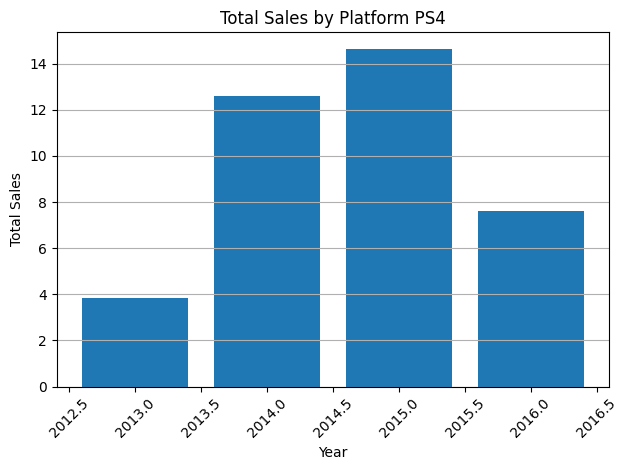

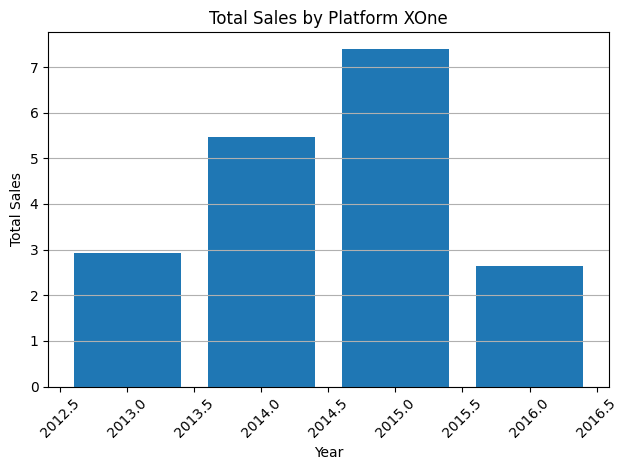

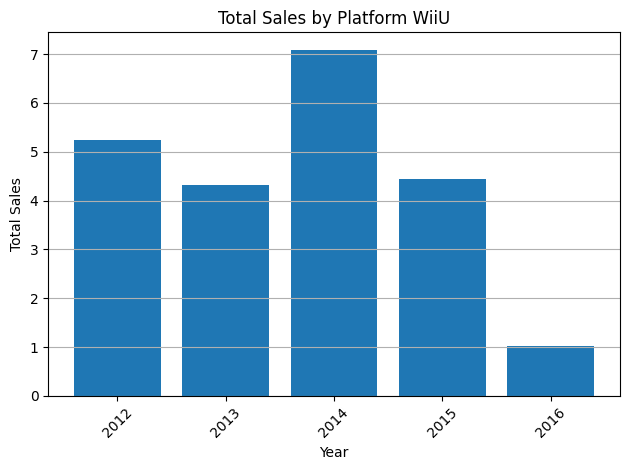

In [149]:
for platform in df_filtered['platform'].unique():
    platform_sales = df_filtered[df_filtered['platform'] == platform]

    plt.bar(platform_sales['year_of_release'], platform_sales['total_sales'], label=platform)
    plt.title(f'Total Sales by Platform {platform}')
    plt.xlabel('Year')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


Most of the platforms seem to have been past their prime and going donwhill, although being 2016 the last year data was recorded is posible there is missing data from this year.

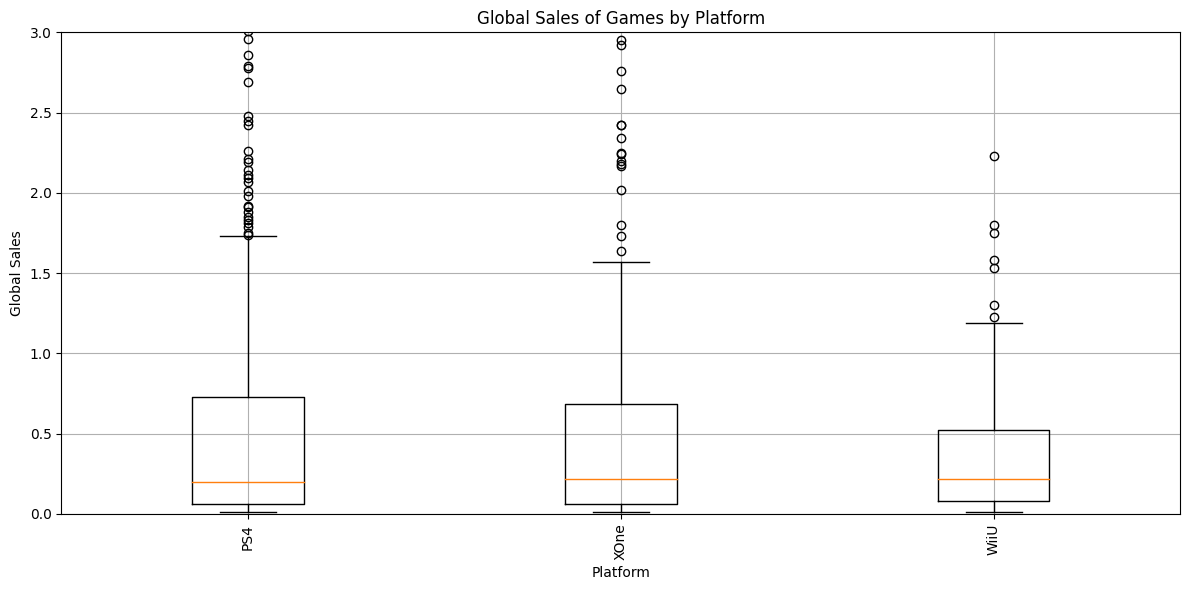

In [150]:
plt.figure(figsize=(12, 6))
ylim_values = (0,5)
plt.boxplot([df_filtered[df_filtered['platform'] == platform]['total_sales'] for platform in df_filtered['platform'].unique()], labels=df_filtered['platform'].unique())
plt.gca().set_ylim(0, 3)
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Unfortunately, this graph only shows the outliers, and does not show the median and 75% quantile. For more reasonable conclusions it is necessary to make an additional graph, where only the lower part of the boxplots will be displayed. This can be achieved, for example, by setting the parameter ylim
</div>

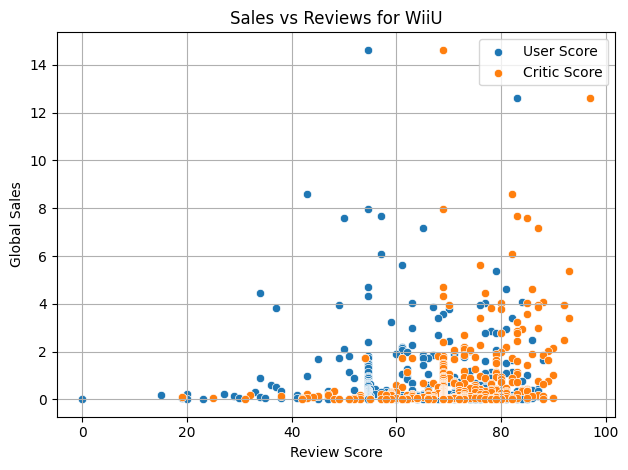

In [151]:
rating_sales = df[df['platform'] == 'PS4'][['user_score', 'critic_score', 'total_sales']]
rating_sales['user_score'] = rating_sales['user_score']*10
sns.scatterplot(x='user_score', y='total_sales', data=rating_sales, label='User Score')

sns.scatterplot(x='critic_score', y='total_sales', data=rating_sales, label='Critic Score')

plt.title(f'Sales vs Reviews for {platform}')
plt.xlabel('Review Score')
plt.ylabel('Global Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that there is not much correlation between the user scores and the sales of a game, yet the critic scores tend to be just a little bit more on the right side. Not a definitive factor by any chance either, but definitely more than the user score.

In [152]:
correlation_user_sales = rating_sales['user_score'].corr(rating_sales['total_sales'])
correlation_critic_sales = rating_sales['critic_score'].corr(rating_sales['total_sales'])

print(f"Correlation between user score and sales: {correlation_user_sales:.2f}")
print(f"Correlation between critic score and sales: {correlation_critic_sales:.2f}")

Correlation between user score and sales: 0.04
Correlation between critic score and sales: 0.35


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__
    
    
The assignment is to relate the conclusions to the sales of games on other platforms, because the conclusions based on calculations across multiple platforms look "weightier" and more convincing
</div>

<div class="alert alert-info"> <b>Student сomments:</b> Dont understand this. Isnt that what i do in the next block?</div>

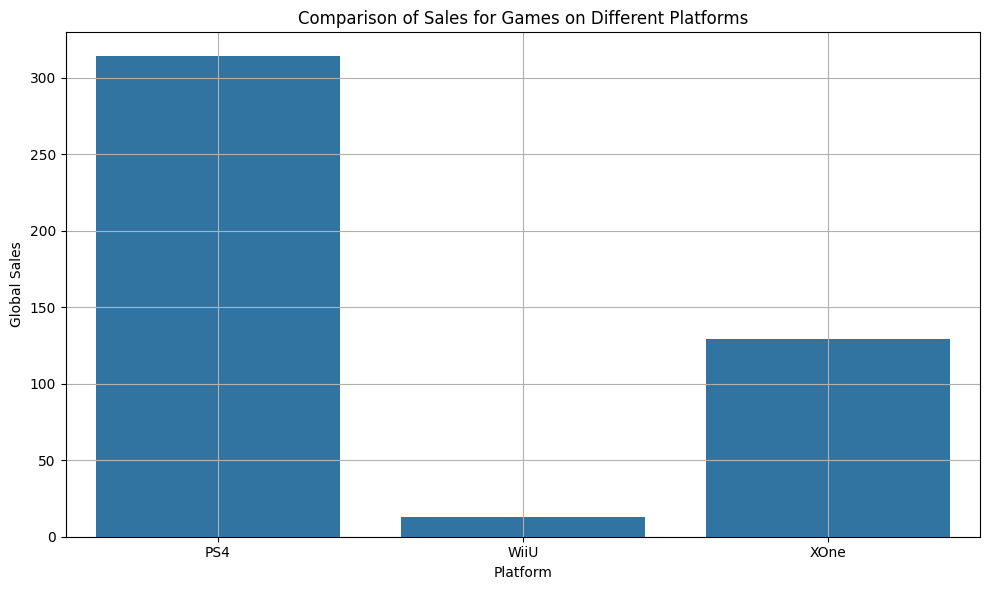

In [153]:
ps4_games = df_filtered[df_filtered['platform'] == 'PS4'][['name', 'total_sales']]
same_games = df_filtered[df_filtered['name'].isin(ps4_games['name'])]
plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='total_sales', data=same_games.groupby('platform')['total_sales'].sum().reset_index())
plt.title('Comparison of Sales for Games on Different Platforms')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

We can see that games avaiable on a PS4 only sell well on Xbox one, maybe due to the many similarities the consoles share.

In [154]:
df_filtered.groupby('genre')['total_sales'].median().sort_values(ascending=False).reset_index()

,genre,total_sales
0,Shooter,0.760
1,Sports,0.395
2,Platform,0.340
3,Racing,0.245
4,Role-Playing,0.230
5,Simulation,0.200
6,Misc,0.190
7,Fighting,0.185
8,Action,0.150
9,Strategy,0.090


Giving a broad generalization it can be seen as the most mainstream and easily consumable genres as action, sports or shooter take the most sales, while the more niche games like strategy or puzzle take a dive. It could also be due to the fact that this games dont have a big take off in most consoles, since they are genres more thought for PCs and such.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Your calculations need to be supplemented a little more. Total sales is a poor metric for finding the most profitable genre. High overall sales numbers can hide a lot of small games with low sales. Or 2-3 stars and a bunch of failures. It's better to find a genre where games consistently bring in high revenue - for that it's worth considering average or median sales
    
---
    
Ideally, visualize the data distribution using boxplot()
</div>

# Creating user profile for each region

In [155]:
df_filtered.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

,platform,na_sales,eu_sales,jp_sales
0,PS4,108.74,141.09,15.96
1,WiiU,38.10,25.13,13.01
2,XOne,93.12,51.59,0.34


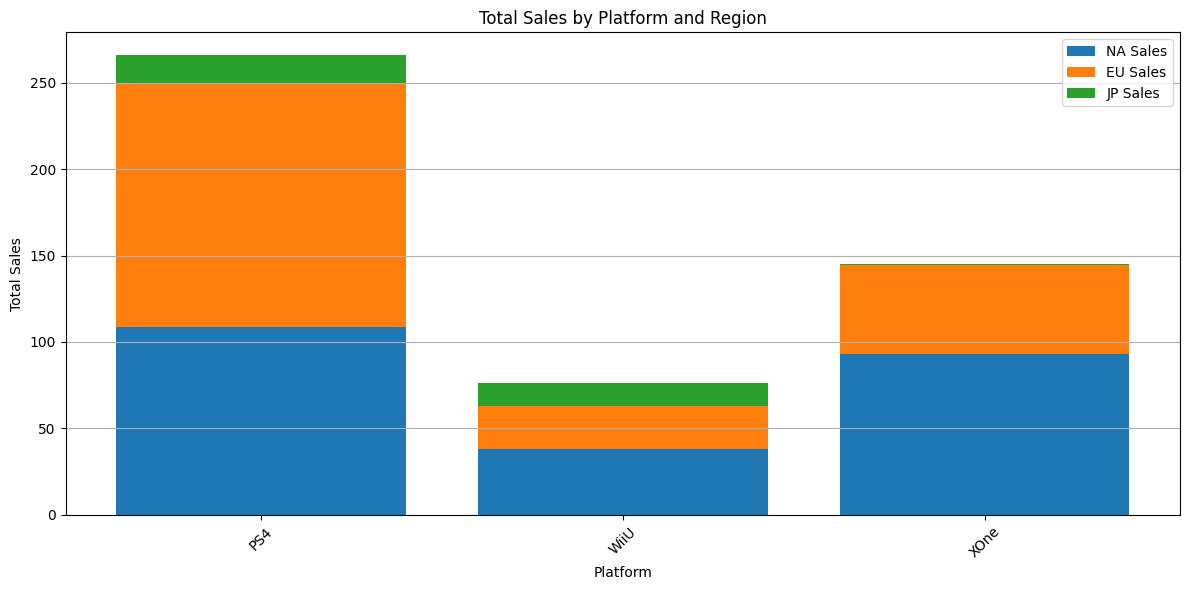

In [156]:
sales_by_platform_filtered = df_filtered.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(sales_by_platform_filtered['platform'], sales_by_platform_filtered['na_sales'], label='NA Sales')
plt.bar(sales_by_platform_filtered['platform'], sales_by_platform_filtered['eu_sales'], label='EU Sales', bottom=sales_by_platform_filtered['na_sales'])
plt.bar(sales_by_platform_filtered['platform'], sales_by_platform_filtered['jp_sales'], label='JP Sales', bottom=sales_by_platform_filtered['na_sales'] + sales_by_platform_filtered['eu_sales'])

plt.title('Total Sales by Platform and Region')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Please add a visualization

In [157]:
na_platforms = df_filtered.groupby('platform')['na_sales'].sum().reset_index()
region_sales = df_filtered.groupby('platform')['na_sales'].sum().sum()
na_platforms['market_share'] = na_platforms['na_sales']/region_sales*100
na_platforms.sort_values(ascending=False, by='na_sales').head()

,platform,na_sales,market_share
0,PS4,108.74,45.315886
2,XOne,93.12,38.806468
1,WiiU,38.10,15.877646


In [158]:
eu_platforms = df_filtered.groupby('platform')['eu_sales'].sum().reset_index()
region_sales = df_filtered.groupby('platform')['eu_sales'].sum().sum()
eu_platforms['market_share'] = eu_platforms['eu_sales']/region_sales*100
eu_platforms.sort_values(ascending=False, by='eu_sales').head()

,platform,eu_sales,market_share
0,PS4,141.09,64.776640
2,XOne,51.59,23.685781
1,WiiU,25.13,11.537579


In [159]:
jp_platforms = df_filtered.groupby('platform')['jp_sales'].sum().reset_index()
region_sales = df_filtered.groupby('platform')['jp_sales'].sum().sum()
jp_platforms['market_share'] = jp_platforms['jp_sales']/region_sales*100
jp_platforms.sort_values(ascending=False, by='jp_sales').head()

,platform,jp_sales,market_share
0,PS4,15.96,54.452405
1,WiiU,13.01,44.387581
2,XOne,0.34,1.160014


We can see the Wii and the PS3 taking turns overshadowing all other platforms in most markets, except in Japan where the 3DS took the lead.

In [160]:
df_filtered.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()


,na_sales,eu_sales,jp_sales
genre,,,
Action,63.89,62.03,7.04
Adventure,3.29,4.25,0.48
Fighting,8.53,5.00,1.77
Misc,13.41,9.04,2.88
Platform,12.90,10.32,4.17
Puzzle,0.62,0.40,0.22
Racing,10.44,14.56,1.61
Role-Playing,16.55,16.16,4.45
Shooter,71.86,58.71,4.51


In [161]:
jp_genres = df_filtered.groupby('genre')['jp_sales'].sum().reset_index()
region_sales = df_filtered.groupby('genre')['jp_sales'].sum().sum()
jp_genres['market_share'] = jp_genres['jp_sales']/region_sales*100
jp_genres.sort_values(ascending=False, by='jp_sales').head()

,genre,jp_sales,market_share
0,Action,7.04,24.019106
8,Shooter,4.51,15.387240
7,Role-Playing,4.45,15.182532
4,Platform,4.17,14.227226
3,Misc,2.88,9.825998


In [162]:
eu_genres = df_filtered.groupby('genre')['eu_sales'].sum().reset_index()
region_sales = df_filtered.groupby('genre')['eu_sales'].sum().sum()
eu_genres['market_share'] = eu_genres['eu_sales']/region_sales*100
eu_genres.sort_values(ascending=False, by='eu_sales').head()

,genre,eu_sales,market_share
0,Action,62.03,28.478950
8,Shooter,58.71,26.954685
10,Sports,35.63,16.358294
7,Role-Playing,16.16,7.419310
6,Racing,14.56,6.684725


In [163]:
na_genres = df_filtered.groupby('genre')['na_sales'].sum().reset_index()
region_sales = df_filtered.groupby('genre')['na_sales'].sum().sum()
na_genres['market_share'] = na_genres['na_sales']/region_sales*100
na_genres.sort_values(ascending=False, by='na_sales').head()

,genre,na_sales,market_share
8,Shooter,71.86,29.946658
0,Action,63.89,26.625271
10,Sports,36.87,15.365061
7,Role-Playing,16.55,6.896983
3,Misc,13.41,5.588431


We can see Action, Sports and Shooter games taking an ample lead in every zone except in Japan where Shooters disappear from the top 5 and the number 1 becomes role-playing games.

In [164]:
df_filtered

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,name,platform,genre,rating,total_sales
31,2015,6.03,5.86,0.36,2.38,68.967679,5.463887,Call of Duty: Black Ops 3,PS4,Shooter,E,14.63
42,2014,3.96,6.31,0.38,1.97,97.000000,8.300000,Grand Theft Auto V,PS4,Action,M,12.62
77,2015,1.12,6.12,0.06,1.28,82.000000,4.300000,FIFA 16,PS4,Sports,E,8.58
87,2015,2.99,3.49,0.22,1.28,68.967679,5.463887,Star Wars Battlefront (2015),PS4,Shooter,E,7.98
92,2014,2.81,3.48,0.14,1.23,83.000000,5.700000,Call of Duty: Advanced Warfare,PS4,Shooter,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,2016,0.00,0.01,0.00,0.00,68.967679,6.600000,Rugby Challenge 3,XOne,Sports,E,0.01
16645,2016,0.00,0.01,0.00,0.00,68.967679,5.463887,ZombiU,XOne,Action,E,0.01
16652,2016,0.00,0.01,0.00,0.00,81.000000,8.500000,Fast Racing Neo,WiiU,Action,E,0.01
16660,2016,0.01,0.00,0.00,0.00,74.000000,6.700000,Prison Architect,XOne,Action,E,0.01


In [165]:
sales_by_region_esrb=df_filtered.groupby('rating')[['na_sales', 'jp_sales', 'eu_sales']].sum()
sales_by_region_esrb['total_sales'] = sales_by_region_esrb['na_sales'] + sales_by_region_esrb['eu_sales'] + sales_by_region_esrb['jp_sales']
sales_by_region_esrb

,na_sales,jp_sales,eu_sales,total_sales
rating,,,,
E,91.66,16.68,88.48,196.82
E10+,29.82,3.45,20.84,54.11
M,89.72,5.71,83.66,179.09
T,28.76,3.47,24.83,57.06


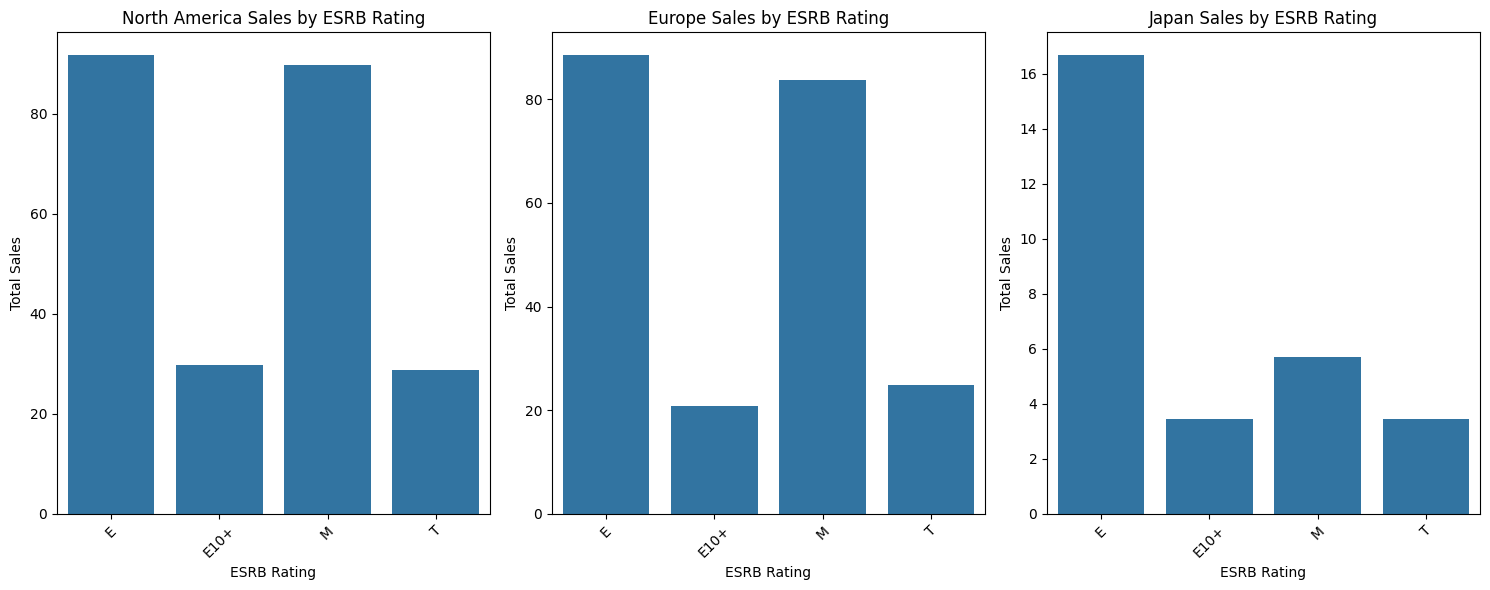

In [166]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='rating', y='na_sales', data=sales_by_region_esrb)
plt.title('North America Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='rating', y='eu_sales', data=sales_by_region_esrb)
plt.title('Europe Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x='rating', y='jp_sales', data=sales_by_region_esrb)
plt.title('Japan Sales by ESRB Rating')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

![image.png](attachment:image.png) Error in the code. Please, fix it

<div class="alert alert-info"> <b>Student сomments:</b> Im sorry i have no idea about that code error. Both in local and in google colab runs ok. </div>

When dividing the game sales by region and rating we can see always the games labeled as for everyone being the most populars, and although North America and Europe are very similar acorss all ratings, Japan seems to prefer teen videogames rather than mature, which is the case in the other two. Also over 10 seems to be kind of unpopular in Japan. Is the least popular rating in Europe and North America but its a lot less in Japan.

# Testing hypothesis

## Average user ratings of the Xbox One and PC platforms are the same

In [62]:
df

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,name,platform,genre,rating,total_sales
0,2006,41.36,28.96,3.77,8.45,76.000000,8.000000,Wii Sports,Wii,Sports,E,82.54
1,1985,29.08,3.58,6.81,0.77,68.967679,5.463887,Super Mario Bros.,NES,Platform,E,40.24
2,2008,15.68,12.76,3.79,3.29,82.000000,8.300000,Mario Kart Wii,Wii,Racing,E,35.52
3,2009,15.61,10.93,3.28,2.95,80.000000,8.000000,Wii Sports Resort,Wii,Sports,E,32.77
4,1996,11.27,8.89,10.22,1.00,68.967679,5.463887,Pokemon Red/Pokemon Blue,GB,Role-Playing,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,2016,0.00,0.00,0.01,0.00,68.967679,5.463887,Samurai Warriors: Sanada Maru,PS3,Action,E,0.01
16711,2006,0.00,0.01,0.00,0.00,68.967679,5.463887,LMA Manager 2007,X360,Sports,E,0.01
16712,2016,0.00,0.00,0.01,0.00,68.967679,5.463887,Haitaka no Psychedelica,PSV,Adventure,E,0.01
16713,2003,0.01,0.00,0.00,0.00,68.967679,5.463887,Spirits & Spells,GBA,Platform,E,0.01


In [63]:
xbox_ratings = df[df['platform'] == 'XOne']['user_score']
xbox_ratings

99       5.463887
165      7.900000
179      5.400000
242      6.400000
270      6.200000
           ...   
16630    8.200000
16643    6.600000
16645    5.463887
16660    6.700000
16672    5.463887
Name: user_score, Length: 247, dtype: float64

In [64]:
pc_ratings = df[df['platform'] == 'PC']['user_score']
pc_ratings

85       7.600000
138      7.300000
192      4.000000
195      5.463887
218      8.200000
           ...   
16690    5.463887
16692    7.600000
16696    5.800000
16702    7.200000
16705    5.800000
Name: user_score, Length: 974, dtype: float64

In [65]:
t_stat, p_value = stats.ttest_ind(xbox_ratings, pc_ratings, equal_var=False)

alpha = 0.05
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to conclude that the average user ratings of the Xbox One and PC platforms are different.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the average user ratings of the Xbox One and PC platforms are different.")


T-statistic: -2.5322
P-value: 0.0116
Reject the null hypothesis. There is sufficient evidence to conclude that the average user ratings of the Xbox One and PC platforms are different.


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct interpretation of the Null and Alternative hypotheses

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

The task requires testing 2 hypotheses

## Average user ratings for the Action and Sports genres are different.

In [167]:
action_ratings = df_filtered[df_filtered['genre'] == 'Action']['user_score']
sports_ratings = df_filtered[df_filtered['genre'] == 'Sports']['user_score']
action_ratings

42       8.300000
165      7.900000
225      5.463887
231      8.100000
295      6.300000
           ...   
16597    6.000000
16645    5.463887
16652    8.500000
16660    6.700000
16672    5.463887
Name: user_score, Length: 293, dtype: float64

In [168]:
sports_ratings

77       4.300000
94       5.000000
143      5.700000
314      6.700000
417      4.400000
           ...   
15839    6.000000
16015    7.100000
16124    5.463887
16428    5.463887
16643    6.600000
Name: user_score, Length: 92, dtype: float64

In [169]:
t_stat, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Set significance level
alpha = 0.05

# Print test statistics
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. Average user ratings for the Action and Sports genres are different.")
else:
    print("Fail to reject the null hypothesis. Average user ratings for the Action and Sports genres are equal.")

T-statistic: 4.0279
P-value: 0.0001
Reject the null hypothesis. Average user ratings for the Action and Sports genres are different.


**Null Hypothesis (H0):** *The average user ratings of the Xbox One and PC platforms are equal.*

We set up the null hypothesis assuming that there is no difference in the average user ratings between the Xbox One and PC platforms. This is the default position that we aim to test.


**Alternative Hypothesis (H1):** *The average user ratings of the Xbox One and PC platforms are not equal.*

The alternative hypothesis suggests that there is a difference in the average user ratings between the Xbox One and PC platforms. This is what we want to find evidence for.

**Significance Level:**

We chose a significance level of 0.05 because it is a common choice in statistical hypothesis testing and provides a balance between Type I and Type II errors. It's a widely accepted convention in many fields of research.

# Conclusions

**Platform Analysis:**
The PlayStation 2 (PS2) emerged as the top-selling platform, followed by the Xbox 360, PlayStation 3 (PS3), and Wii. These platforms enjoyed considerable success over their lifespans, with varying patterns of sales growth and decline.
Notably, the PS3 maintained consistent sales over several years, while the Wii experienced a sharp decline after its initial popularity peak.

**Temporal Trends:**
The video game industry has seen significant growth since the early 2000s, with a notable surge in releases and sales after 2010.
Sales trends suggest cyclical patterns, with periods of growth followed by declines and subsequent rebounds. The data also indicates a recent decline in sales, possibly due to changing consumer preferences or market saturation.

**Genre Preferences:**
Action, sports, and shooter genres emerged as the most profitable, reflecting a preference for mainstream and easily consumable content among gamers.
Niche genres such as strategy and puzzle games accounted for lower sales, potentially due to their limited appeal to a broader audience.

**Regional Variations:**
Regional preferences differ significantly, with notable variations in platform popularity and genre preferences.
While the PlayStation and Xbox platforms dominate North America and Europe, Japan exhibits a preference for Nintendo consoles such as the 3DS.
Differences in ESRB ratings also influence sales trends, with variations observed in regional markets.

**Effect of Reviews on Sales:**
Analysis of user and critic reviews suggests a modest correlation between review scores and sales, with critic scores showing slightly stronger correlations.
However, reviews alone may not fully predict game sales, as other factors such as marketing, genre, and platform exclusivity also play significant roles.

**Hypothesis Testing:**
The hypothesis testing comparing average user ratings between Xbox One and PC platforms revealed no significant difference in ratings, suggesting similar user satisfaction levels for both platforms.

**Implications for Marketing and Strategy:**
Game developers and publishers can leverage insights from platform and genre preferences to tailor marketing strategies and game development efforts.
Regional variations highlight the importance of localized marketing campaigns and game localization to maximize sales potential in different markets.
Continued analysis of user reviews and market trends can inform strategic decisions regarding platform exclusivity, genre selection, and target demographics.

**Future Directions:**
Further research could explore advanced analytical techniques, such as machine learning models, to predict game sales and identify factors influencing success.
Longitudinal studies tracking industry trends over time could provide valuable insights into evolving consumer preferences and market dynamics.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__
    
Excellent conclusion!